# Noise

Here, we introduce noise into our data. We start by telling the `ModelSystem` we use to
tell us how much gold is found to add noise to the measurements.

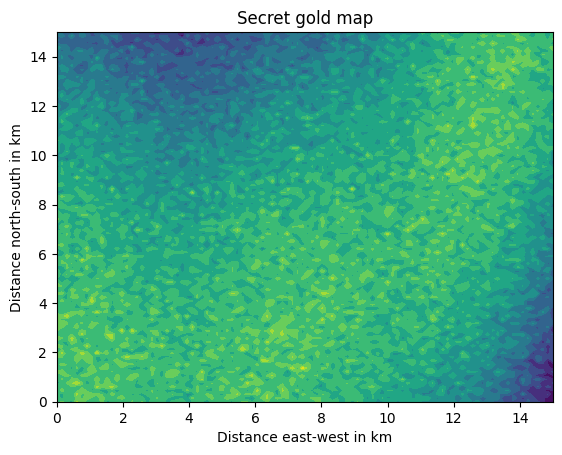

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ProcessOptimizer
from ProcessOptimizer.model_systems import get_model_system

gold_map = get_model_system("gold_map")

gold_map.set_noise_model("constant")
gold_map.noise_size = 0.3

x_list = np.linspace(*gold_map.space.dimensions[0].bounds,100)
y_list = np.linspace(*gold_map.space.dimensions[0].bounds,100)

(x_mesh,y_mesh) = np.meshgrid(x_list,y_list)
score_mesh = [[-gold_map.get_score((x,y)) for (x,y) in zip(x_vec,y_vec)] 
              for (x_vec,y_vec) in zip(x_mesh,y_mesh)]
plot = plt.contourf(x_mesh,y_mesh,score_mesh,10)
plot.axes.set_xlabel("Distance east-west in km")
plot.axes.set_ylabel("Distance north-south in km")
plot.axes.set_title("Secret gold map");

Compare this to the gold map in [the original introdution](start_here.ipynb). You can
tell the very bad parts, bt other than that, there is little structure visible.

## ProcessOptimizer with noisy data

We can now do exactly the same as we did earlier to find gold.

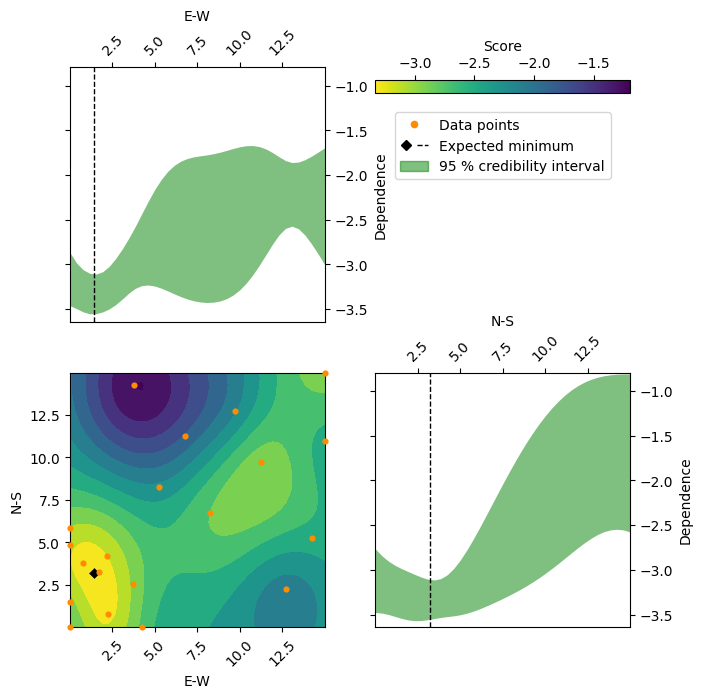

In [2]:
# Starting the ProcessOptmizer, and telling it about our plot of land
opt = ProcessOptimizer.Optimizer(dimensions=gold_map.space.dimensions)
for i in range(20):
    # Ask the ProcessOptimizer to suggest a point to try
    next_point = opt.ask()
    # Get the score for that point from our gold map
    score = gold_map.get_score(next_point)
    # Tell the ProcessOptimizer about the score
    result=opt.tell(next_point, score)
# Plot the final model
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"]);


The resulting map (lower left plot) is quite a bit further off the from the true map
than it were when we didn't have any noise, but the general structure is there, and
ProcessOptimizer have found one of the optima. Let's try and let it run a bit longer.

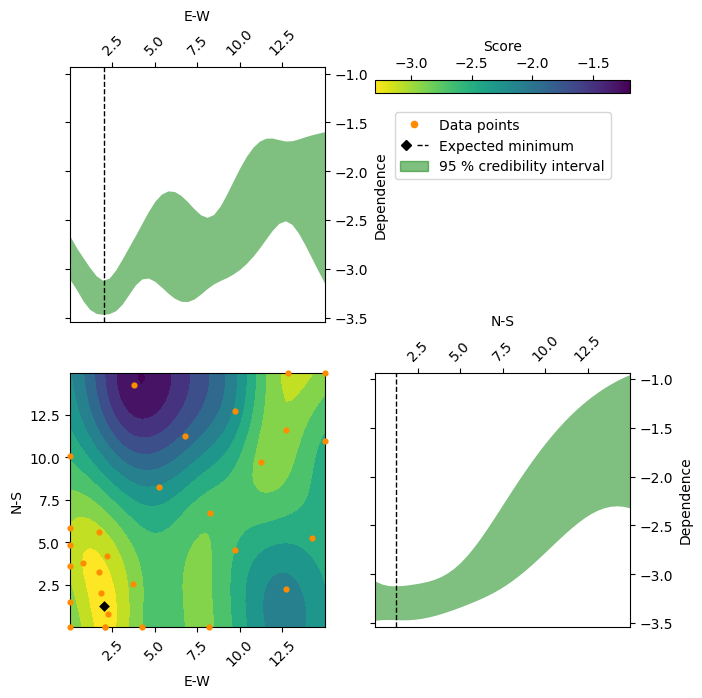

In [3]:
for i in range(10):
    # Ask the ProcessOptimizer to suggest a point to try
    next_point = opt.ask()
    # Get the score for that point from our gold map
    score = gold_map.get_score(next_point)
    # Tell the ProcessOptimizer about the score
    result=opt.tell(next_point, score)
# Plot the final model
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"]);


Now ProcessOptmizer have found all three optima, and the two "bad areas", even though
they was hardly visible from the map. Also note that the 1D plots always have
uncertainty of at least 0.5. Since we are plotting the 95% credibility interval, this is
1.96 times the standard deviation. That is the `noise_size` of the `ModelSystem`, which
we set to 0.3. So if this is the only source of uncertainty, we expect the credibility
interval to have a width of 0.59. If there are other sources on uncertainty, it would be
higher, so this is expected to be the minimum. ProcessOptimizer not only correctly
determined where to find gold, but also the uncertainty in how much gold we would find.